In [54]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("emails.csv")

In [29]:
df.shape

(5728, 2)

In [53]:
#hoining new DATASET WITH EXISTING DATA SET 

import glob
csv_list=glob.glob(r"C:\Users\tanjil\Documents\Python Scripts\CLASS\os\*.csv")
df_list = [pd.read_csv(csv_list[i]) for i in range(2,len(csv_list))]
concatanated_mails_text = []

for i in df_list:
    concatanated_mails_text=concatanated_mails_text+list(i['Subject'])
spam_list = [1 for i in concatanated_mails_text]
reaL_val=pd.DataFrame()
reaL_val['text']=concatanated_mails_text
reaL_val['spam'] = spam_list

In [30]:
df = df.append(reaL_val)

In [32]:
df.shape
#df.head(2)

(5777, 2)

In [33]:
#Dropping Duplicates Value
df.drop_duplicates(inplace =  True)

In [34]:
df.shape

(5740, 2)

In [35]:
#checking for invalid NaN or null values 
df.isnull().sum()

text    0
spam    0
dtype: int64

In [36]:
#downloading Stop Words for filtering out them from the text feature 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanjil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
#this functions remove puntuation and stop words from any feature that has messages or strings
def process_text(text):
    
    # remmove puntuation
    
    no_pun = [char for char in text if char not in string.punctuation]
    no_pun = ''.join(no_pun)
    
    #remove stop words
    
    clean_words = [ word for word in no_pun.split() if word.lower() not in stopwords.words('english')]
    
    return clean_words    

In [38]:
#implemnetation of the thfuction over the message column
df['text'].apply(process_text)

0     [Subject, naturally, irresistible, corporate, ...
1     [Subject, stock, trading, gunslinger, fanny, m...
2     [Subject, unbelievable, new, homes, made, easy...
3     [Subject, 4, color, printing, special, request...
4     [Subject, money, get, software, cds, software,...
                            ...                        
44    [Buy, Driving, License, Belgium, posted, arche...
45    [Contract, work, living, Belgium, posted, Saiy...
46    [Tax, form, nonworking, card, holder, posted, ...
47      [Permit, Brussels, Region, posted, stanamaze11]
48                     [annex, 37, posted, shahsimmy07]
Name: text, Length: 5740, dtype: object

In [39]:
#convert a collection of text to matrix of tokens(represnetation of words ) counts in order to fetch the feature to model to learn

from sklearn.feature_extraction.text import CountVectorizer
message_bag_of_words = CountVectorizer(analyzer = process_text).fit_transform(df['text'])

In [40]:
d=0
for i in message_bag_of_words:
    print(i)
    if d==5:
        break
    d+=1
    

  (0, 3718)	1
  (0, 23493)	1
  (0, 18961)	1
  (0, 10179)	1
  (0, 17816)	1
  (0, 21261)	1
  (0, 28111)	1
  (0, 16794)	1
  (0, 28235)	1
  (0, 9410)	3
  (0, 21775)	2
  (0, 15549)	1
  (0, 32730)	1
  (0, 18358)	1
  (0, 19006)	1
  (0, 16209)	2
  (0, 8168)	1
  (0, 21073)	3
  (0, 32447)	1
  (0, 32096)	1
  (0, 24963)	1
  (0, 36172)	2
  (0, 21552)	2
  (0, 33166)	1
  (0, 23164)	2
  :	:
  (0, 30344)	1
  (0, 12408)	1
  (0, 36577)	1
  (0, 33691)	1
  (0, 10971)	1
  (0, 4340)	1
  (0, 7283)	1
  (0, 15703)	1
  (0, 7523)	1
  (0, 359)	1
  (0, 29984)	1
  (0, 16520)	1
  (0, 27349)	1
  (0, 34929)	1
  (0, 4885)	1
  (0, 8462)	1
  (0, 14316)	1
  (0, 14649)	1
  (0, 32745)	1
  (0, 21209)	1
  (0, 29004)	1
  (0, 9202)	1
  (0, 21120)	1
  (0, 26505)	1
  (0, 18663)	1
  (0, 3718)	1
  (0, 32227)	1
  (0, 34131)	1
  (0, 16580)	1
  (0, 14479)	1
  (0, 22345)	1
  (0, 23289)	1
  (0, 9278)	1
  (0, 5755)	1
  (0, 25649)	1
  (0, 20821)	3
  (0, 13807)	1
  (0, 25777)	1
  (0, 27897)	1
  (0, 30374)	1
  (0, 16461)	1
  (0, 34400)	3
  (

In [41]:
#get the shape of messages_bow 
message_bag_of_words.shape

(5740, 37376)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(message_bag_of_words, df['spam'],test_size = 0.2, random_state = 0)

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier().fit(x_train,y_train)

y_predict = DecisionTree.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       879
           1       0.92      0.91      0.92       269

    accuracy                           0.96      1148
   macro avg       0.95      0.94      0.95      1148
weighted avg       0.96      0.96      0.96      1148


confusion_matrix 
[[858  21]
 [ 24 245]]

 Accuracy Score 
 0.960801393728223


## naive Bayes MultinomialNB

In [44]:
#create and train the naive Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB().fit(x_train,y_train)
y_predict = MultinomialNB.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       879
           1       0.96      0.99      0.98       269

    accuracy                           0.99      1148
   macro avg       0.98      0.99      0.99      1148
weighted avg       0.99      0.99      0.99      1148


confusion_matrix 
[[869  10]
 [  2 267]]

 Accuracy Score 
 0.9895470383275261


### KNN(K- Nearest Neighbors) classifier .

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train,y_train)

y_predict = knn.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.97      0.89      0.92       879
           1       0.71      0.90      0.79       269

    accuracy                           0.89      1148
   macro avg       0.84      0.89      0.86      1148
weighted avg       0.90      0.89      0.89      1148


confusion_matrix 
[[779 100]
 [ 28 241]]

 Accuracy Score 
 0.8885017421602788


### Support Vector classifier.

In [46]:
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

y_predict = svc.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       879
           1       0.98      0.88      0.93       269

    accuracy                           0.97      1148
   macro avg       0.97      0.94      0.96      1148
weighted avg       0.97      0.97      0.97      1148


confusion_matrix 
[[875   4]
 [ 31 238]]

 Accuracy Score 
 0.9695121951219512


### Ensamble Learning Algorithm

In [47]:
from sklearn. ensemble import VotingClassifier
votingClf = VotingClassifier(estimators=[('decisionTree',DecisionTree),
('naiveBayes',MultinomialNB),('knn',knn),('svc',svc)],voting='hard')
votingClf.fit(x_train,y_train)

y_predict = votingClf.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       879
           1       0.99      0.94      0.97       269

    accuracy                           0.99      1148
   macro avg       0.99      0.97      0.98      1148
weighted avg       0.99      0.99      0.99      1148


confusion_matrix 
[[877   2]
 [ 15 254]]

 Accuracy Score 
 0.985191637630662


### Bagging Classifier

In [48]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=4)
bagging.fit(x_train,y_train)

y_predict = bagging.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       879
           1       0.93      0.91      0.92       269

    accuracy                           0.96      1148
   macro avg       0.95      0.94      0.95      1148
weighted avg       0.96      0.96      0.96      1148


confusion_matrix 
[[862  17]
 [ 25 244]]

 Accuracy Score 
 0.9634146341463414


### Ada Boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(n_estimators=4)
adaBoost.fit(x_train,y_train)

y_predict = adaBoost.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 1 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       879
           1       0.67      0.96      0.79       269

    accuracy                           0.88      1148
   macro avg       0.83      0.91      0.85      1148
weighted avg       0.91      0.88      0.89      1148


confusion_matrix 
[[752 127]
 [ 12 257]]

 Accuracy Score 
 0.8789198606271778


### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=4)
randomForest.fit(x_train,y_train)

y_predict = randomForest.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test.values}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 0 0 ... 0 0 0]

y_test 
[1 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       879
           1       0.97      0.77      0.85       269

    accuracy                           0.94      1148
   macro avg       0.95      0.88      0.91      1148
weighted avg       0.94      0.94      0.94      1148


confusion_matrix 
[[872   7]
 [ 63 206]]

 Accuracy Score 
 0.9390243902439024


In [51]:
dict_acc ={'decisionTree':accuracy_score(y_test,DecisionTree.predict(x_test)),
           'naiveBayes':accuracy_score(y_test,MultinomialNB.predict(x_test)),
           'KNN':accuracy_score(y_test,knn.predict(x_test)),
           'SVC':accuracy_score(y_test,svc.predict(x_test)),
           'Ensemble_voting':accuracy_score(y_test,votingClf.predict(x_test)),
           'bagging':accuracy_score(y_test,bagging.predict(x_test)),
           'AdaBoost':accuracy_score(y_test,adaBoost.predict(x_test)),
           'Random Forest':accuracy_score(y_test,randomForest.predict(x_test))
           }

In [52]:
for i in dict_acc:
    print(f"{i}\t\n\t{dict_acc[i]}")

decisionTree	
	0.960801393728223
naiveBayes	
	0.9895470383275261
KNN	
	0.8885017421602788
SVC	
	0.9695121951219512
Ensemble_voting	
	0.985191637630662
bagging	
	0.9634146341463414
AdaBoost	
	0.8789198606271778
Random Forest	
	0.9390243902439024


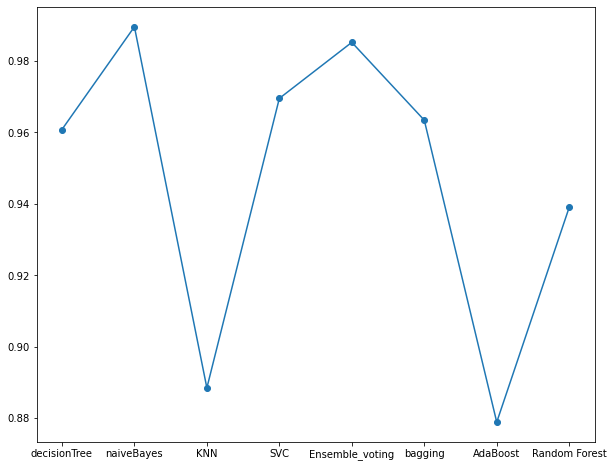

In [65]:
keyes = [i for i in dict_acc]
values = [dict_acc[i]for i in dict_acc]

plt.figure(figsize=(10,8))
plt.plot(keyes,values)
plt.scatter(list(range(8)),values)


plt.show()

In [66]:
import json
 
# Opening JSON file
with open('email_model.json') as json_file:
    data = json.load(json_file)

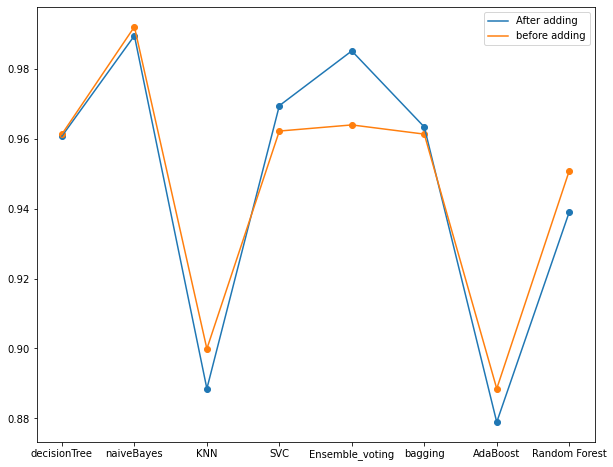

In [78]:
keyes = [i for i in dict_acc]
values = [dict_acc[i] for i in dict_acc]

keyes2 = [i for i in data]
values2 = [data[i]for i in data]

plt.figure(figsize=(10,8))

plt.plot(keyes,values,label = "After adding")
plt.scatter(list(range(8)),values)

plt.plot(keyes2,values2,label = "before adding")
plt.scatter(list(range(8)),values2)
plt.legend()

plt.show()